In [ ]:
##############################################################################
# Maximum Likelihood Estimation (MLE)
# For Normal, Poisson, and Bernoulli Distributions
# Author: Nisa Dar
##############################################################################

# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, bernoulli
from scipy.optimize import minimize
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

##############################################################################
# NORMAL DISTRIBUTION - Estimate mean (μ) and standard deviation (σ)
##############################################################################

# Generate a large sample of normally distributed data (e.g., exam scores)
data_normal = np.random.normal(loc=75, scale=12, size=500)
# loc = true mean, scale = true std deviation, size = number of samples

# Plot histogram of the normal data
plt.figure(figsize=(8,5))
sns.histplot(data_normal, bins=20, kde=True, color='skyblue')
plt.title("Normal Distribution (Generated Data)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Define negative log-likelihood for Normal distribution
def neg_log_likelihood_normal(params):
    mu, sigma = params
    if sigma <= 0:  # std deviation must be positive
        return np.inf
    return -np.sum(norm.logpdf(data_normal, mu, sigma))

# Perform optimization to estimate μ and σ
result_normal = minimize(neg_log_likelihood_normal, x0=[70, 10])
mle_mu, mle_sigma = result_normal.x

print("=== Normal Distribution MLE Results ===")
print(f"Estimated Mean (μ): {mle_mu:.3f}")
print(f"Estimated Std Dev (σ): {mle_sigma:.3f}")

# Plot fitted PDF against histogram
x = np.linspace(min(data_normal), max(data_normal), 100)
plt.figure(figsize=(8,5))
sns.histplot(data_normal, bins=20, stat="density", color="lightgray", label="Data")
plt.plot(x, norm.pdf(x, mle_mu, mle_sigma), 'r-', lw=2, label=f"Fitted PDF (μ={mle_mu:.2f}, σ={mle_sigma:.2f})")
plt.title("MLE Fit: Normal Distribution")
plt.legend()
plt.show()


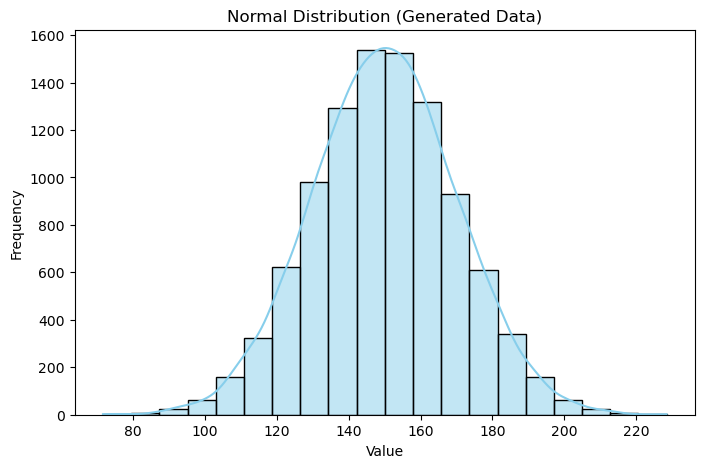

=== Normal Distribution MLE Results ===
Estimated Mean (μ): 149.957
Estimated Std Dev (σ): 20.068


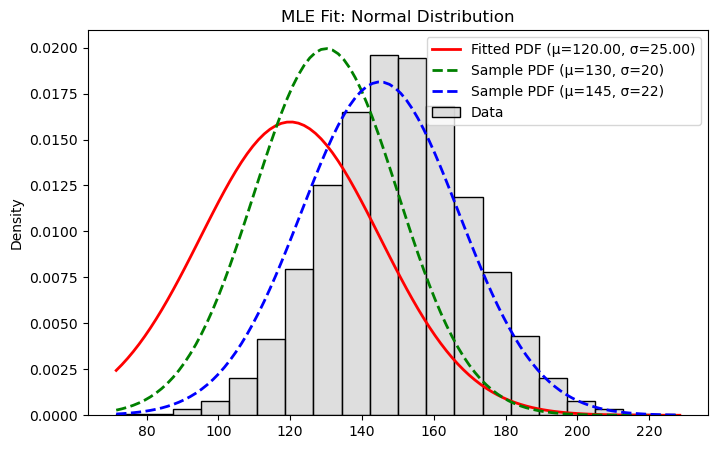

In [18]:
##############################################################################
# Maximum Likelihood Estimation (MLE)
#Geneate a dataset of 10.000 datapoints
#use mean 150
#use standard deviation 20
##############################################################################

# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, bernoulli
from scipy.optimize import minimize
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

##############################################################################
# NORMAL DISTRIBUTION - Estimate mean (μ) and standard deviation (σ)
##############################################################################

# Generate a large sample of normally distributed data (e.g., exam scores)
data_normal = np.random.normal(loc=150, scale=20, size=10000)
# loc = true mean, scale = true std deviation, size = number of samples

# Plot histogram of the normal data
plt.figure(figsize=(8,5))
sns.histplot(data_normal, bins=20, kde=True, color='skyblue')
plt.title("Normal Distribution (Generated Data)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Define negative log-likelihood for Normal distribution
def neg_log_likelihood_normal(params):
    mu, sigma = params
    if sigma <= 0:  # std deviation must be positive
        return np.inf
    return -np.sum(norm.logpdf(data_normal, mu, sigma))

# Perform optimization to estimate μ and σ
result_normal = minimize(neg_log_likelihood_normal, x0=[150, 22])
mle_mu, mle_sigma = result_normal.x

print("=== Normal Distribution MLE Results ===")
print(f"Estimated Mean (μ): {mle_mu:.3f}")
print(f"Estimated Std Dev (σ): {mle_sigma:.3f}")

# Plot fitted PDF against histogram
x = np.linspace(min(data_normal), max(data_normal), 100)
plt.figure(figsize=(8,5))
sns.histplot(data_normal, bins=20, stat="density", color="lightgray", label="Data")
mle_mu = 120
mle_sigma = 25
plt.plot(x, norm.pdf(x, mle_mu, mle_sigma), 'r-', lw=2, label=f"Fitted PDF (μ={mle_mu:.2f}, σ={mle_sigma:.2f})")
plt.plot(x, norm.pdf(x, 130, 20),color='green',lw=2, linestyle='--', label='Sample PDF (μ=130, σ=20)')
plt.plot(x, norm.pdf(x, 145, 22),color='blue',lw=2, linestyle='--', label='Sample PDF (μ=145, σ=22)')
plt.title("MLE Fit: Normal Distribution")
plt.legend()
plt.show()


In [ ]:

##############################################################################
# POISSON DISTRIBUTION - Estimate λ (rate)
##############################################################################

# Generate Poisson-distributed count data (e.g., customer arrivals per hour)
data_poisson = np.random.poisson(lam=4, size=500)

# Plot histogram of Poisson data
plt.figure(figsize=(8,5))
sns.histplot(data_poisson, bins=range(0, max(data_poisson)+1), color='orange')
plt.title("Poisson Distribution (Generated Data)")
plt.xlabel("Event Count")
plt.ylabel("Frequency")
plt.show()

# Define negative log-likelihood for Poisson distribution
def neg_log_likelihood_poisson(lam):
    if lam <= 0:
        return np.inf
    return -np.sum(poisson.logpmf(data_poisson, lam))

# Optimize to find best λ
result_poisson = minimize(lambda x: neg_log_likelihood_poisson(x[0]), x0=[2])
mle_lambda = result_poisson.x[0]

print("\n=== Poisson Distribution MLE Results ===")
print(f"Estimated λ (Rate): {mle_lambda:.3f}")

# Plot fitted PMF over histogram
x = np.arange(0, max(data_poisson)+1)
plt.figure(figsize=(8,5))
sns.histplot(data_poisson, bins=range(0, max(data_poisson)+1), stat="probability", color="lightgray", label="Data")
plt.plot(x, poisson.pmf(x, mle_lambda), 'r--', lw=2, label=f"Fitted PMF (λ={mle_lambda:.2f})")
plt.title("MLE Fit: Poisson Distribution")
plt.xlabel("Count")
plt.ylabel("Probability")
plt.legend()
plt.show()


In [ ]:

##############################################################################
# BERNOULLI DISTRIBUTION - Estimate p (probability of success)
##############################################################################

# Generate binary data (e.g., success=1, failure=0)
# Suppose the true probability of success is 0.65
data_bern = np.random.binomial(n=1, p=0.65, size=500)

# Plot histogram for binary outcomes
plt.figure(figsize=(6,4))
sns.countplot(x=data_bern, palette="pastel")
plt.xticks([0,1], ["Failure (0)", "Success (1)"])
plt.title("Bernoulli Distribution (Generated Data)")
plt.ylabel("Count")
plt.show()

# Define negative log-likelihood for Bernoulli distribution
def neg_log_likelihood_bern(p):
    if p <= 0 or p >= 1:
        return np.inf
    return -np.sum(bernoulli.logpmf(data_bern, p))

# Optimize to find p
result_bern = minimize(lambda x: neg_log_likelihood_bern(x[0]), x0=[0.5])
mle_p = result_bern.x[0]

print("\n=== Bernoulli Distribution MLE Results ===")
print(f"Estimated p (Probability of Success): {mle_p:.3f}")

# Plot observed vs fitted probability
plt.figure(figsize=(6,4))
counts = [np.mean(data_bern==0), np.mean(data_bern==1)]
plt.bar(["Failure (0)", "Success (1)"], counts, color="lightblue", label="Observed")
plt.bar(["Failure (0)", "Success (1)"], [1-mle_p, mle_p], alpha=0.6, color="red", label=f"Fitted (p={mle_p:.2f})")
plt.title("MLE Fit: Bernoulli Distribution")
plt.ylabel("Probability")
plt.legend()
plt.show()



In [ ]:
##############################################################################
# Summary Table
##############################################################################
print("\n MLE Summary:")
print(f"{'Distribution':<15}{'Parameter(s)':<25}")
print("-"*45)
print(f"{'Normal':<15}μ={mle_mu:.2f}, σ={mle_sigma:.2f}")
print(f"{'Poisson':<15}λ={mle_lambda:.2f}")
print(f"{'Bernoulli':<15}p={mle_p:.2f}")
